# Power Analysis

In [1]:
import cPickle
import os

import gdpy
import matplotlib as mpl
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import rpy2.robjects as robjects
from rpy2.robjects import pandas2ri
pandas2ri.activate()
from rpy2.robjects import r
import scipy.stats as stats
import seaborn as sns
plt.rcParams['font.sans-serif'] = ['Helvetica'] + plt.rcParams['font.sans-serif']

from IPython.display import display, HTML

%matplotlib inline
%load_ext rpy2.ipython

outdir = '../output/power_analysis'
if not os.path.exists(outdir):
    os.makedirs(outdir)
private_outdir = '../private_output/power_analysis'
if not os.path.exists(private_outdir):
    os.makedirs(private_outdir)

In [37]:
lof_gene = pd.read_table('../output/power_calculations/lof_gene_power.tsv', 
                         index_col=0)

In [57]:
'","'.join([x for x in lof_gene.columns if ('_rr2_bayes_' in x) and ('lower' not in x) and ('upper' not in x)])

'power_rr2_bayes_AFR","power_rr2_bayes_AMR","power_rr2_bayes_ASJ","power_rr2_bayes_EAS","power_rr2_bayes_FIN","power_rr2_bayes_NFE","power_rr2_bayes_SAS'

In [50]:
rr2 = lof_gene[[x for x in lof_gene.columns if ('_rr2_bayes_' in x) and
               ('lower' not in x) and ('upper' not in x)]] > 0.8
rr2.columns = [x.split('_')[-1] for x in rr2.columns]
rr2 = rr2
rr2 = rr2[rr2.sum(axis=1) != 0]
rr2 = rr2.sort_values(by=list(rr2.columns), ascending=False)

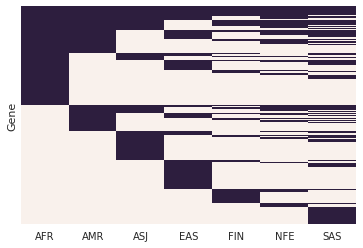

In [51]:
sns.heatmap(rr2, yticklabels=False, cbar=False);

In [52]:
rr4 = lof_gene[[x for x in lof_gene.columns if ('_rr4_bayes_' in x) and
               ('lower' not in x) and ('upper' not in x)]] > 0.8
rr4.columns = [x.split('_')[-1] for x in rr4.columns]
rr4 = rr4
rr4 = rr4[rr4.sum(axis=1) != 0]
rr4 = rr4.sort_values(by=list(rr4.columns), ascending=False)

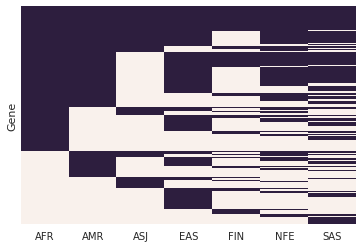

In [53]:
sns.heatmap(rr4, yticklabels=False, cbar=False);

In [59]:
list(rr4.columns)

['AFR', 'AMR', 'ASJ', 'EAS', 'FIN', 'NFE', 'SAS']